# ML MAJOR PROJECT

## Questions -

#### Q1) What are the most common emotions/words used by Males and Females?
#### Q2) What is the time when most of the tweets are created by Males and Females?

In [1]:
# pip install nltk

In [2]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
# nltk.download()
import seaborn as sns

In [3]:
df = pd.read_csv('information.csv',encoding='ISO-8859-1')

# Exploratory Data Analysis

In [4]:
df.head()

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  815719226    False   finalized                   3    10/26/15 23:24   
1  815719227    False   finalized                   3    10/26/15 23:30   
2  815719228    False   finalized                   3    10/26/15 23:33   
3  815719229    False   finalized                   3    10/26/15 23:10   
4  815719230    False   finalized                   3     10/27/15 1:15   

   gender  gender:confidence profile_yn  profile_yn:confidence  \
0    male             1.0000        yes                    1.0   
1    male             1.0000        yes                    1.0   
2    male             0.6625        yes                    1.0   
3    male             1.0000        yes                    1.0   
4  female             1.0000        yes                    1.0   

          created  ...                                       profileimage  \
0    12/5/13 1:48  ...  https://pbs.twimg.com/profile_images/414342229...   
1   10/1/12 13:51  ...  https://pbs.twimg.com/profile_images/539604221...   
2  11/28/14 11:30  ...  https://pbs.twimg.com/profile_images/657330418...   
3   6/11/09 22:39  ...  https://pbs.twimg.com/profile_images/259703936...   
4   4/16/14 13:23  ...  https://pbs.twimg.com/profile_images/564094871...   

   retweet_count sidebar_color  \
0              0        FFFFFF   
1              0        C0DEED   
2              1        C0DEED   
3              0        C0DEED   
4              0             0   

                                                text tweet_coord tweet_count  \
0  Robbie E Responds To Critics After Win Against...         NaN      110964   
1  ÛÏIt felt like they were my friends and I was...         NaN        7471   
2  i absolutely adore when louis starts the songs...         NaN        5617   
3  Hi @JordanSpieth - Looking at the url - do you...         NaN        1693   
4  Watching Neighbours on Sky+ catching up with t...         NaN       31462   

    tweet_created      tweet_id   tweet_location               user_timezone  
0  10/26/15 12:40  6.587300e+17  main; @Kan1shk3                     Chennai  
1  10/26/15 12:40  6.587300e+17              NaN  Eastern Time (US & Canada)  
2  10/26/15 12:40  6.587300e+17           clcncl                    Belgrade  
3  10/26/15 12:40  6.587300e+17    Palo Alto, CA  Pacific Time (US & Canada)  
4  10/26/15 12:40  6.587300e+17              NaN                         NaN  

[5 rows x 26 columns]

In [5]:
df.tail()

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
20045  815757572     True      golden                 259               NaN   
20046  815757681     True      golden                 248               NaN   
20047  815757830     True      golden                 264               NaN   
20048  815757921     True      golden                 250               NaN   
20049  815757985     True      golden                 249               NaN   

       gender  gender:confidence profile_yn  profile_yn:confidence  \
20045  female             1.0000        yes                    1.0   
20046    male             1.0000        yes                    1.0   
20047    male             1.0000        yes                    1.0   
20048  female             0.8489        yes                    1.0   
20049  female             1.0000        yes                    1.0   

             created  ...                                       profileimage  \
20045   8/5/15 21:16  ...  https://pbs.twimg.com/profile_images/656793310...   
20046  8/15/12 21:17  ...  https://pbs.twimg.com/profile_images/639815429...   
20047    9/3/12 1:17  ...  https://pbs.twimg.com/profile_images/655473271...   
20048  11/6/12 23:46  ...  https://pbs.twimg.com/profile_images/657716093...   
20049  4/14/14 17:22  ...  https://pbs.twimg.com/profile_images/655134724...   

       retweet_count sidebar_color  \
20045              0        C0DEED   
20046              0             0   
20047              0        C0DEED   
20048              0             0   
20049              0        C0DEED   

                                                    text tweet_coord  \
20045  @lookupondeath ...Fine, and I'll drink tea too...         NaN   
20046  Greg Hardy you a good player and all but don't...         NaN   
20047  You can miss people and still never want to se...         NaN   
20048  @bitemyapp i had noticed your tendency to pee ...         NaN   
20049  I think for my APUSH creative project I'm goin...         NaN   

      tweet_count   tweet_created      tweet_id      tweet_location  \
20045         783  10/26/15 13:20  6.587400e+17          Verona ªÁ   
20046       13523  10/26/15 12:40  6.587300e+17     Kansas City, MO   
20047       26419  10/26/15 13:20  6.587400e+17      Lagos Nigeria    
20048       56073  10/26/15 12:40  6.587300e+17  Texas Hill Country   
20049        2922  10/26/15 13:19  6.587400e+17                 NaN   

      user_timezone  
20045           NaN  
20046           NaN  
20047           NaN  
20048           NaN  
20049           NaN  

[5 rows x 26 columns]

In [6]:
df.shape

(20050, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [8]:
df.describe()

_unit_id  _trusted_judgments  gender:confidence  \
count  2.005000e+04        20050.000000       20024.000000   
mean   8.157294e+08            3.615711           0.882756   
std    6.000801e+03           12.331890           0.191403   
min    8.157192e+08            3.000000           0.000000   
25%    8.157243e+08            3.000000           0.677800   
50%    8.157294e+08            3.000000           1.000000   
75%    8.157345e+08            3.000000           1.000000   
max    8.157580e+08          274.000000           1.000000   

       profile_yn:confidence     fav_number  retweet_count   tweet_count  \
count           20050.000000   20050.000000   20050.000000  2.005000e+04   
mean                0.993221    4382.201646       0.079401  3.892469e+04   
std                 0.047168   12518.575919       2.649751  1.168371e+05   
min                 0.627200       0.000000       0.000000  1.000000e+00   
25%                 1.000000      11.000000       0.000000  2.398000e+03   
50%                 1.000000     456.000000       0.000000  1.144150e+04   
75%                 1.000000    3315.500000       0.000000  4.002750e+04   
max                 1.000000  341621.000000     330.000000  2.680199e+06   

           tweet_id  
count  2.005000e+04  
mean   6.587350e+17  
std    5.000124e+12  
min    6.587300e+17  
25%    6.587300e+17  
50%    6.587300e+17  
75%    6.587400e+17  
max    6.587400e+17

In [9]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
df['gender'].unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

In [11]:
df.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

# Cleaning the Data

In [12]:
#Dropping all the columns which are not needed to get the results
df = df.drop(axis=1, labels = ['_unit_id','user_timezone','profile_yn','name','profile_yn:confidence','_last_judgment_at','profile_yn_gold','fav_number','gender_gold','_golden','_unit_state','_trusted_judgments','created','link_color','tweet_location','tweet_id','tweet_coord','sidebar_color','profileimage','retweet_count'])

In [13]:
df

gender  gender:confidence  \
0        male             1.0000   
1        male             1.0000   
2        male             0.6625   
3        male             1.0000   
4      female             1.0000   
...       ...                ...   
20045  female             1.0000   
20046    male             1.0000   
20047    male             1.0000   
20048  female             0.8489   
20049  female             1.0000   

                                             description  \
0                                  i sing my own rhythm.   
1      I'm the author of novels filled with family dr...   
2                    louis whining and squealing and all   
3      Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4      Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
...                                                  ...   
20045                                               (rp)   
20046  Whatever you like, it's not a problem at all. ...   
20047  #TeamBarcelona ..You look lost so you should f...   
20048  Anti-statist; I homeschool my kids. Aspiring t...   
20049                     Teamwork makes the dream work.   

                                                    text  tweet_count  \
0      Robbie E Responds To Critics After Win Against...       110964   
1      ÛÏIt felt like they were my friends and I was...         7471   
2      i absolutely adore when louis starts the songs...         5617   
3      Hi @JordanSpieth - Looking at the url - do you...         1693   
4      Watching Neighbours on Sky+ catching up with t...        31462   
...                                                  ...          ...   
20045  @lookupondeath ...Fine, and I'll drink tea too...          783   
20046  Greg Hardy you a good player and all but don't...        13523   
20047  You can miss people and still never want to se...        26419   
20048  @bitemyapp i had noticed your tendency to pee ...        56073   
20049  I think for my APUSH creative project I'm goin...         2922   

        tweet_created  
0      10/26/15 12:40  
1      10/26/15 12:40  
2      10/26/15 12:40  
3      10/26/15 12:40  
4      10/26/15 12:40  
...               ...  
20045  10/26/15 13:20  
20046  10/26/15 12:40  
20047  10/26/15 13:20  
20048  10/26/15 12:40  
20049  10/26/15 13:19  

[20050 rows x 6 columns]

In [14]:
df.isnull().sum()

gender                 97
gender:confidence      26
description          3744
text                    0
tweet_count             0
tweet_created           0
dtype: int64

In [15]:
df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [16]:
#filling all the null values in description with blanks
df['description'].fillna(value = '',inplace = True)

In [17]:
df.dropna(subset = ['gender'],inplace = True)
df = df[df.gender != 'unknown']

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
# Label Encoding
#Adding a column in data frame for gender to be in numerical value
df['gender_num']=le.fit_transform(df['gender'])
df

C:\Users\Hp\anacondA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


gender  gender:confidence  \
0        male             1.0000   
1        male             1.0000   
2        male             0.6625   
3        male             1.0000   
4      female             1.0000   
...       ...                ...   
20045  female             1.0000   
20046    male             1.0000   
20047    male             1.0000   
20048  female             0.8489   
20049  female             1.0000   

                                             description  \
0                                  i sing my own rhythm.   
1      I'm the author of novels filled with family dr...   
2                    louis whining and squealing and all   
3      Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4      Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
...                                                  ...   
20045                                               (rp)   
20046  Whatever you like, it's not a problem at all. ...   
20047  #TeamBarcelona ..You look lost so you should f...   
20048  Anti-statist; I homeschool my kids. Aspiring t...   
20049                     Teamwork makes the dream work.   

                                                    text  tweet_count  \
0      Robbie E Responds To Critics After Win Against...       110964   
1      ÛÏIt felt like they were my friends and I was...         7471   
2      i absolutely adore when louis starts the songs...         5617   
3      Hi @JordanSpieth - Looking at the url - do you...         1693   
4      Watching Neighbours on Sky+ catching up with t...        31462   
...                                                  ...          ...   
20045  @lookupondeath ...Fine, and I'll drink tea too...          783   
20046  Greg Hardy you a good player and all but don't...        13523   
20047  You can miss people and still never want to se...        26419   
20048  @bitemyapp i had noticed your tendency to pee ...        56073   
20049  I think for my APUSH creative project I'm goin...         2922   

        tweet_created  gender_num  
0      10/26/15 12:40           2  
1      10/26/15 12:40           2  
2      10/26/15 12:40           2  
3      10/26/15 12:40           2  
4      10/26/15 12:40           1  
...               ...         ...  
20045  10/26/15 13:20           1  
20046  10/26/15 12:40           2  
20047  10/26/15 13:20           2  
20048  10/26/15 12:40           1  
20049  10/26/15 13:19           1  

[18836 rows x 7 columns]

In [20]:
df.drop_duplicates(inplace = True)
df

C:\Users\Hp\anacondA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


gender  gender:confidence  \
0        male             1.0000   
1        male             1.0000   
2        male             0.6625   
3        male             1.0000   
4      female             1.0000   
...       ...                ...   
20038   brand             0.8397   
20040    male             0.8472   
20041   brand             1.0000   
20042   brand             0.6364   
20048  female             0.8489   

                                             description  \
0                                  i sing my own rhythm.   
1      I'm the author of novels filled with family dr...   
2                    louis whining and squealing and all   
3      Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4      Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
...                                                  ...   
20038  The FUN site for Animal Lovers - Get the lates...   
20040  Houston Chronicle Columnist  - ken.hoffman@chr...   
20041  When families go through divorce, it's helpful...   
20042  Reviews of delectable #food, picturesque #trav...   
20048  Anti-statist; I homeschool my kids. Aspiring t...   

                                                    text  tweet_count  \
0      Robbie E Responds To Critics After Win Against...       110964   
1      ÛÏIt felt like they were my friends and I was...         7471   
2      i absolutely adore when louis starts the songs...         5617   
3      Hi @JordanSpieth - Looking at the url - do you...         1693   
4      Watching Neighbours on Sky+ catching up with t...        31462   
...                                                  ...          ...   
20038  Jon Stewart's Animal Sanctuary And Educational...         7083   
20040  Discovered it in England. It's how they eat fi...         3084   
20041  For Stan and Lisa... has #Coffee Cup at https:...       105864   
20042  Best Bloody Mary Brunch at the #NYCWFF @nyceff...         5900   
20048  @bitemyapp i had noticed your tendency to pee ...        56073   

        tweet_created  gender_num  
0      10/26/15 12:40           2  
1      10/26/15 12:40           2  
2      10/26/15 12:40           2  
3      10/26/15 12:40           2  
4      10/26/15 12:40           1  
...               ...         ...  
20038  10/26/15 13:19           0  
20040  10/26/15 13:19           2  
20041  10/26/15 13:19           0  
20042  10/26/15 12:40           0  
20048  10/26/15 12:40           1  

[18806 rows x 7 columns]

## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013E80605F48>,
      dtype=object)

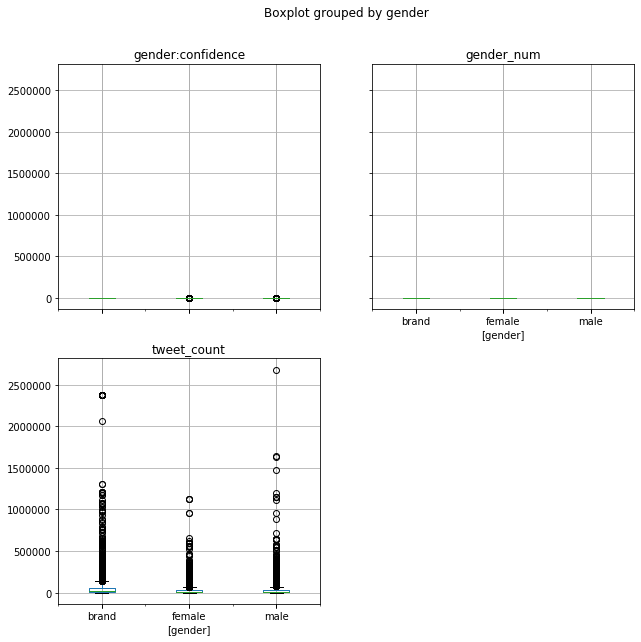

In [21]:
df.boxplot(by=['gender'],figsize = (10,10))

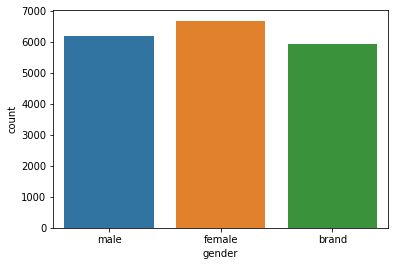

In [22]:
sns.countplot(df['gender'],label="Gender")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013E80AC3188>,
      dtype=object)

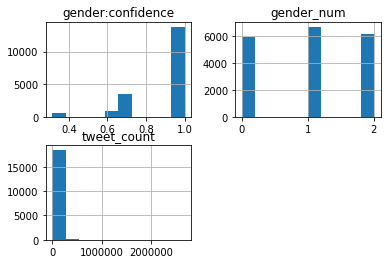

In [23]:
df.hist()

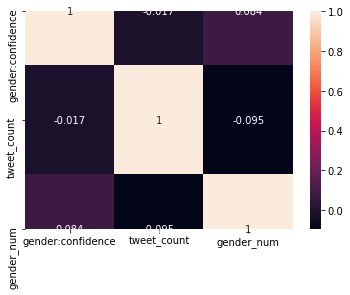

In [24]:
sns.heatmap(df.corr(),annot=True)

# Normalizing the texts

In [25]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [26]:
from nltk.corpus import stopwords
list_of_stopwords = list(stopwords.words('english'))
list_of_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
text = df['text']
text

0        Robbie E Responds To Critics After Win Against...
1        ÛÏIt felt like they were my friends and I was...
2        i absolutely adore when louis starts the songs...
3        Hi @JordanSpieth - Looking at the url - do you...
4        Watching Neighbours on Sky+ catching up with t...
                               ...                        
20038    Jon Stewart's Animal Sanctuary And Educational...
20040    Discovered it in England. It's how they eat fi...
20041    For Stan and Lisa... has #Coffee Cup at https:...
20042    Best Bloody Mary Brunch at the #NYCWFF @nyceff...
20048    @bitemyapp i had noticed your tendency to pee ...
Name: text, Length: 18806, dtype: object

In [28]:
df

gender  gender:confidence  \
0        male             1.0000   
1        male             1.0000   
2        male             0.6625   
3        male             1.0000   
4      female             1.0000   
...       ...                ...   
20038   brand             0.8397   
20040    male             0.8472   
20041   brand             1.0000   
20042   brand             0.6364   
20048  female             0.8489   

                                             description  \
0                                  i sing my own rhythm.   
1      I'm the author of novels filled with family dr...   
2                    louis whining and squealing and all   
3      Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4      Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
...                                                  ...   
20038  The FUN site for Animal Lovers - Get the lates...   
20040  Houston Chronicle Columnist  - ken.hoffman@chr...   
20041  When families go through divorce, it's helpful...   
20042  Reviews of delectable #food, picturesque #trav...   
20048  Anti-statist; I homeschool my kids. Aspiring t...   

                                                    text  tweet_count  \
0      Robbie E Responds To Critics After Win Against...       110964   
1      ÛÏIt felt like they were my friends and I was...         7471   
2      i absolutely adore when louis starts the songs...         5617   
3      Hi @JordanSpieth - Looking at the url - do you...         1693   
4      Watching Neighbours on Sky+ catching up with t...        31462   
...                                                  ...          ...   
20038  Jon Stewart's Animal Sanctuary And Educational...         7083   
20040  Discovered it in England. It's how they eat fi...         3084   
20041  For Stan and Lisa... has #Coffee Cup at https:...       105864   
20042  Best Bloody Mary Brunch at the #NYCWFF @nyceff...         5900   
20048  @bitemyapp i had noticed your tendency to pee ...        56073   

        tweet_created  gender_num  
0      10/26/15 12:40           2  
1      10/26/15 12:40           2  
2      10/26/15 12:40           2  
3      10/26/15 12:40           2  
4      10/26/15 12:40           1  
...               ...         ...  
20038  10/26/15 13:19           0  
20040  10/26/15 13:19           2  
20041  10/26/15 13:19           0  
20042  10/26/15 12:40           0  
20048  10/26/15 12:40           1  

[18806 rows x 7 columns]

In [29]:
clean_text = []
for i in range(df.shape[0]):
    text_msg = df['text'].values[i]
    tokenized_text = word_tokenize(text_msg)
    clean_msg = ''
    for word in tokenized_text:
        word = word.lower()
        if not word in list_of_stopwords and word != '.' and word != "''" and word!="``"and word !=']' and word !='!' and word !='%' and word !='&' and word !='?' and word !='//' and word !=';' and word !='|' and word != ' ' and word != "'" and word !='"' and  word !='[' and word != '@' and word != ',' and word !='#' and word !='..' and word !='-' and word !='(' and word !=')' and word != '...' and word != '/' and word !=':'and word !='https:' and word !='https' and word != "'s" and word != "n't" and word != "'m":
            clean_msg += word + ' '
            
    clean_text.append(clean_msg)
    
clean_text

['robbie e responds critics win eddie edwards worldtitleseries //t.co/nsybbmvjkz ',
 '\x89ûïit felt like friends living story them\x89û\x9d //t.co/arnge0yhno retired ian1 //t.co/cizcanpqfz ',
 'absolutely adore louis starts songs hits hard feels good ',
 'hi jordanspieth looking url use ifttt typically see advanced user pgatour //t.co/h68ou5pe9l ',
 'watching neighbours sky+ catching neighbs xxx _ù÷ä_ù÷ä_ù÷ä_ùôî_ù\x8fè_ùô\x8d_ù\x8fè xxx ',
 'ive seen people train lamps chairs tvs etc //t.co/w6zf4pvm4i ',
 'bpackengineer thank patience take care issue ',
 'gala bingo clubs bought å£241m uk largest high street bingo operator gala taken by\x89û_ //t.co/hzeeykjud3 ',
 '_aphmau_ pic defines mcd fangirls/fanboys mcd shippers xd ',
 'evielady lovely tree year never seen gorgeous autumn colour ',
 'taking care //t.co/orl9u1p8yi fitfluential ',
 'mtg deals 1x rank-up-magic seventh one prio-en058 secret rare unlimi //t.co/y22wylpgnn //t.co/vwagxmnohb ',
 'put ass line repay ',
 '//t.co/z4sbwuugd

In [30]:
clean_description = []
for i in range(df.shape[0]):
    descript = df['description'].values[i]
    tokenized_word = word_tokenize(descript)
    clean_msg = ''
    for word in tokenized_word:
        word = word.lower()
        if not word in list_of_stopwords and word != "''"and  word != '/'and word!="``" and word != '.' and word !=']' and word !='!' and word !='%' and word !='&' and word !='?' and word !='//' and word !=';' and word !='|' and word != ' ' and word != "'" and word !='"' and  word !='[' and word != '@' and word != ',' and word !='#' and word !='..' and word !='-' and word !='(' and word !=')' and word != '...' and word !=':'and word !='https:' and word !='https' and word != "'s" and word != "n't" and word != "'m":
            clean_msg += word + ' '
            
    clean_description.append(clean_msg)
    
clean_description

['sing rhythm ',
 'author novels filled family drama romance ',
 'louis whining squealing ',
 'mobile guy 49ers shazam google kleiner perkins yahoo sprint pcs airtouch air force stanford gsb uva dad husband brother golfer ',
 'ricky wilson best frontman/kaiser chiefs best band xxxx thank kaiser chiefs incredible year gigs memories cherish always xxxxxxx ',
 'know ',
 'global marketplace images videos music sharing photos inspiration design tips videos creative community ',
 'secret getting ahead getting started ',
 'pll fan crazy mcd ramen bae ',
 'renaissance art historian university nottingham fuelled haribo partial coffee soft spot renaissance china national teaching fellow ',
 'clean food tastes great providing energy nutrients guilt granola vegan/paleo friendly options cert organic gf kosher ',
 'highly extraordinary auctions ',
 "senior '16 xi-xii-mmxiv ",
 'come join fastest blog network online today http //t.co/s5mfpa1vgk http //t.co/mpuuqtyf1g cover credit repair credit cards 

In [31]:
df['clean_description'] = clean_description

C:\Users\Hp\anacondA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df['clean_text'] = clean_text

C:\Users\Hp\anacondA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df

gender  gender:confidence  \
0        male             1.0000   
1        male             1.0000   
2        male             0.6625   
3        male             1.0000   
4      female             1.0000   
...       ...                ...   
20038   brand             0.8397   
20040    male             0.8472   
20041   brand             1.0000   
20042   brand             0.6364   
20048  female             0.8489   

                                             description  \
0                                  i sing my own rhythm.   
1      I'm the author of novels filled with family dr...   
2                    louis whining and squealing and all   
3      Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4      Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
...                                                  ...   
20038  The FUN site for Animal Lovers - Get the lates...   
20040  Houston Chronicle Columnist  - ken.hoffman@chr...   
20041  When families go through divorce, it's helpful...   
20042  Reviews of delectable #food, picturesque #trav...   
20048  Anti-statist; I homeschool my kids. Aspiring t...   

                                                    text  tweet_count  \
0      Robbie E Responds To Critics After Win Against...       110964   
1      ÛÏIt felt like they were my friends and I was...         7471   
2      i absolutely adore when louis starts the songs...         5617   
3      Hi @JordanSpieth - Looking at the url - do you...         1693   
4      Watching Neighbours on Sky+ catching up with t...        31462   
...                                                  ...          ...   
20038  Jon Stewart's Animal Sanctuary And Educational...         7083   
20040  Discovered it in England. It's how they eat fi...         3084   
20041  For Stan and Lisa... has #Coffee Cup at https:...       105864   
20042  Best Bloody Mary Brunch at the #NYCWFF @nyceff...         5900   
20048  @bitemyapp i had noticed your tendency to pee ...        56073   

        tweet_created  gender_num  \
0      10/26/15 12:40           2   
1      10/26/15 12:40           2   
2      10/26/15 12:40           2   
3      10/26/15 12:40           2   
4      10/26/15 12:40           1   
...               ...         ...   
20038  10/26/15 13:19           0   
20040  10/26/15 13:19           2   
20041  10/26/15 13:19           0   
20042  10/26/15 12:40           0   
20048  10/26/15 12:40           1   

                                       clean_description  \
0                                           sing rhythm    
1             author novels filled family drama romance    
2                               louis whining squealing    
3      mobile guy 49ers shazam google kleiner perkins...   
4      ricky wilson best frontman/kaiser chiefs best ...   
...                                                  ...   
20038  fun site animal lovers get latest animal news ...   
20040  houston chronicle columnist ken.hoffman chron....   
20041  families go divorce helpful parents talk divor...   
20042  reviews delectable food picturesque travel kic...   
20048  anti-statist homeschool kids aspiring thoughtl...   

                                              clean_text  
0      robbie e responds critics win eddie edwards wo...  
1      ûïit felt like friends living story themû /...  
2      absolutely adore louis starts songs hits hard ...  
3      hi jordanspieth looking url use ifttt typicall...  
4      watching neighbours sky+ catching neighbs xxx ...  
...                                                  ...  
20038  jon stewart animal sanctuary educational cente...  
20040  discovered england eat fish chips never went b...  
20041        stan lisa coffee cup //t.co/isnpire5zi ufo   
20042  best bloody mary brunch nycwff nyceff deathsdo...  
20048  bitemyapp noticed tendency pee carpet want say...  

[18806 rows x 9 columns]

##### Feature Engineering

In [34]:
df['all_features'] = df['clean_text'].str.cat(df['clean_description'],sep ='')


C:\Users\Hp\anacondA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df['all_features']

0        robbie e responds critics win eddie edwards wo...
1        ûïit felt like friends living story themû /...
2        absolutely adore louis starts songs hits hard ...
3        hi jordanspieth looking url use ifttt typicall...
4        watching neighbours sky+ catching neighbs xxx ...
                               ...                        
20038    jon stewart animal sanctuary educational cente...
20040    discovered england eat fish chips never went b...
20041    stan lisa coffee cup //t.co/isnpire5zi ufo fam...
20042    best bloody mary brunch nycwff nyceff deathsdo...
20048    bitemyapp noticed tendency pee carpet want say...
Name: all_features, Length: 18806, dtype: object

In [36]:
df['gender:confidence'] = df[df['gender:confidence']==1]

C:\Users\Hp\anacondA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df

gender gender:confidence  \
0        male              male   
1        male              male   
2        male               NaN   
3        male              male   
4      female            female   
...       ...               ...   
20038   brand               NaN   
20040    male               NaN   
20041   brand             brand   
20042   brand               NaN   
20048  female               NaN   

                                             description  \
0                                  i sing my own rhythm.   
1      I'm the author of novels filled with family dr...   
2                    louis whining and squealing and all   
3      Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4      Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
...                                                  ...   
20038  The FUN site for Animal Lovers - Get the lates...   
20040  Houston Chronicle Columnist  - ken.hoffman@chr...   
20041  When families go through divorce, it's helpful...   
20042  Reviews of delectable #food, picturesque #trav...   
20048  Anti-statist; I homeschool my kids. Aspiring t...   

                                                    text  tweet_count  \
0      Robbie E Responds To Critics After Win Against...       110964   
1      ÛÏIt felt like they were my friends and I was...         7471   
2      i absolutely adore when louis starts the songs...         5617   
3      Hi @JordanSpieth - Looking at the url - do you...         1693   
4      Watching Neighbours on Sky+ catching up with t...        31462   
...                                                  ...          ...   
20038  Jon Stewart's Animal Sanctuary And Educational...         7083   
20040  Discovered it in England. It's how they eat fi...         3084   
20041  For Stan and Lisa... has #Coffee Cup at https:...       105864   
20042  Best Bloody Mary Brunch at the #NYCWFF @nyceff...         5900   
20048  @bitemyapp i had noticed your tendency to pee ...        56073   

        tweet_created  gender_num  \
0      10/26/15 12:40           2   
1      10/26/15 12:40           2   
2      10/26/15 12:40           2   
3      10/26/15 12:40           2   
4      10/26/15 12:40           1   
...               ...         ...   
20038  10/26/15 13:19           0   
20040  10/26/15 13:19           2   
20041  10/26/15 13:19           0   
20042  10/26/15 12:40           0   
20048  10/26/15 12:40           1   

                                       clean_description  \
0                                           sing rhythm    
1             author novels filled family drama romance    
2                               louis whining squealing    
3      mobile guy 49ers shazam google kleiner perkins...   
4      ricky wilson best frontman/kaiser chiefs best ...   
...                                                  ...   
20038  fun site animal lovers get latest animal news ...   
20040  houston chronicle columnist ken.hoffman chron....   
20041  families go divorce helpful parents talk divor...   
20042  reviews delectable food picturesque travel kic...   
20048  anti-statist homeschool kids aspiring thoughtl...   

                                              clean_text  \
0      robbie e responds critics win eddie edwards wo...   
1      ûïit felt like friends living story themû /...   
2      absolutely adore louis starts songs hits hard ...   
3      hi jordanspieth looking url use ifttt typicall...   
4      watching neighbours sky+ catching neighbs xxx ...   
...                                                  ...   
20038  jon stewart animal sanctuary educational cente...   
20040  discovered england eat fish chips never went b...   
20041        stan lisa coffee cup //t.co/isnpire5zi ufo    
20042  best bloody mary brunch nycwff nyceff deathsdo...   
20048  bitemyapp noticed tendency pee carpet want say...   

                                            all_features  
0      robbie e responds critics win eddie

In [38]:
df.shape

(18806, 10)

# Train and Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Independent Variables for this set are 

'all_features' which is the new feature of  concatenation of 'text',  'description' 

,'gender:confidence' and'tweet_count'

whereas,

Dependent variable is 'gender_num' which is the label encoded of 'gender

In [80]:
X = cv.fit_transform(df['all_features'],df[['gender:confidence','tweet_count']])
Y = le.fit_transform(df['gender_num'])

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [82]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((14104, 62946), (4702, 62946), (14104,), (4702,))

Classification algorithms are as follows :

Multinomial Naive Bayes

K-Nearest Neighbors(knn)

Random Forest(rfc)

,and

 Ensemble Learning method - Vote Classifier

# Multinomial Naive Bayes

In [83]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [84]:
from sklearn import metrics
y_pred = nb.predict(X_test)
cm = metrics.accuracy_score(y_pred, Y_test)
cm

0.6363249680986814

# KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)

In [103]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [104]:
from sklearn import metrics
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_pred, Y_test)

0.44576775840068056

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [54]:
rfc.fit(X_train,Y_train)

C:\Users\Hp\anacondA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
y_pred = rfc.predict(X_test)

In [56]:
metrics.accuracy_score(y_pred,Y_test)

0.5744364100382816

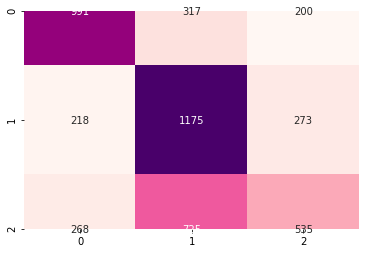

In [57]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(Y_test,y_pred)

sns.heatmap(cm_rf,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [58]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1508
           1       0.53      0.71      0.61      1666
           2       0.53      0.35      0.42      1528

    accuracy                           0.57      4702
   macro avg       0.58      0.57      0.56      4702
weighted avg       0.58      0.57      0.56      4702



# Ensemble Learning

In [59]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [105]:
estimators = []
estimators.append(('KNN',knn))
estimators.append(('randomforest', rfc))
estimators.append(('multinomial naive bayes', nb))

In [106]:
ensemble = VotingClassifier(estimators,voting='hard')

In [107]:
ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=8,
                                                   p=2, weights='uniform')),
                             ('randomforest',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min

In [108]:
ensemble.score(X_test,Y_test)

0.610378562313909

### Which is the best Algorithm for this dataset?

#### Multinomial Naive Bayes  

# Most Common words 

In [99]:
Male = df[df['gender'] == 'male']
Female = df[df['gender'] == 'female']

Male_text = pd.Series(' '.join(Male['clean_text'].astype(str)).lower().split(" "))
Female_text = pd.Series(' '.join(Female['clean_text'].astype(str)).lower().split(" "))

Male_description = pd.Series(' '.join(Male['clean_description'].astype(str)).lower().split(" "))
Female_description = pd.Series(' '.join(Female['clean_description'].astype(str)).lower().split(" "))


In [100]:
Female_words = (Male_text + Male_description).value_counts()[:30]
Male_words = (Female_text + Female_description).value_counts()[:30]

In [66]:
Female_words

          584
get        51
love       49
like       45
http       36
time       33
new        33
one        32
fan        28
know       28
go         27
music      26
back       26
life       25
'll        25
good       24
're        24
follow     23
best       23
im         23
god        23
people     23
see        23
make       22
would      21
got        20
game       19
live       19
great      19
come       19
dtype: int64

In [67]:
# Female_words

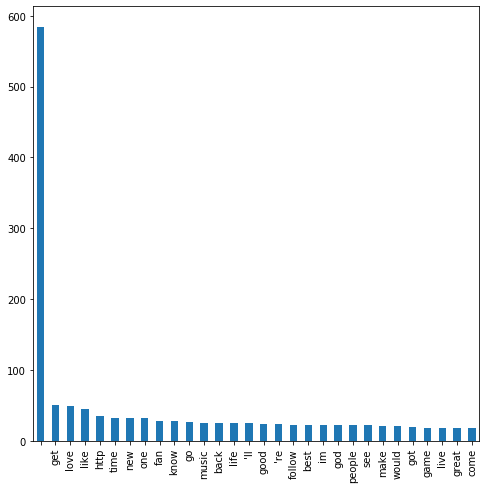

In [68]:
plt.figure(figsize=(8,8))
Female_words.plot(kind='bar',stacked=True)

In [101]:
#Male_words

C:\Users\Hp\anacondA\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anacondA\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


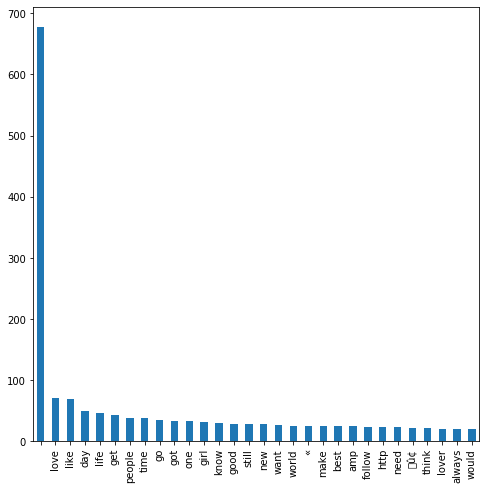

In [70]:
plt.figure(figsize=(8,8))
Male_words.plot(kind='bar',stacked=True)

Q1) What are the most common emotions/words used by Males and Females?

In [73]:
print("Most common words used by Females are :\n" +str(Female_words))

Most common words used by Females are :
          584
get        51
love       49
like       45
http       36
time       33
new        33
one        32
fan        28
know       28
go         27
music      26
back       26
life       25
'll        25
good       24
're        24
follow     23
best       23
im         23
god        23
people     23
see        23
make       22
would      21
got        20
game       19
live       19
great      19
come       19
dtype: int64


In [74]:
print("Most common words used by Males are :\n" +str(Male_words))

Most common words used by Males are :
          677
love       71
like       70
day        49
life       46
get        44
people     38
time       38
go         35
got        34
one        34
girl       31
know       30
good       29
still      29
new        29
want       27
world      26
«          25
make       25
best       25
amp        25
follow     24
http       23
need       23
û¢        22
think      22
lover      21
always     21
would      20
dtype: int64


###### Answer -  love, like, get, one, life are some of the common words used by males and females

# Most common time creating a tweet

In [75]:
df

gender gender:confidence  \
0        male              male   
1        male              male   
2        male               NaN   
3        male              male   
4      female            female   
...       ...               ...   
20038   brand               NaN   
20040    male               NaN   
20041   brand             brand   
20042   brand               NaN   
20048  female               NaN   

                                             description  \
0                                  i sing my own rhythm.   
1      I'm the author of novels filled with family dr...   
2                    louis whining and squealing and all   
3      Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4      Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
...                                                  ...   
20038  The FUN site for Animal Lovers - Get the lates...   
20040  Houston Chronicle Columnist  - ken.hoffman@chr...   
20041  When families go through divorce, it's helpful...   
20042  Reviews of delectable #food, picturesque #trav...   
20048  Anti-statist; I homeschool my kids. Aspiring t...   

                                                    text  tweet_count  \
0      Robbie E Responds To Critics After Win Against...       110964   
1      ÛÏIt felt like they were my friends and I was...         7471   
2      i absolutely adore when louis starts the songs...         5617   
3      Hi @JordanSpieth - Looking at the url - do you...         1693   
4      Watching Neighbours on Sky+ catching up with t...        31462   
...                                                  ...          ...   
20038  Jon Stewart's Animal Sanctuary And Educational...         7083   
20040  Discovered it in England. It's how they eat fi...         3084   
20041  For Stan and Lisa... has #Coffee Cup at https:...       105864   
20042  Best Bloody Mary Brunch at the #NYCWFF @nyceff...         5900   
20048  @bitemyapp i had noticed your tendency to pee ...        56073   

        tweet_created  gender_num  \
0      10/26/15 12:40           2   
1      10/26/15 12:40           2   
2      10/26/15 12:40           2   
3      10/26/15 12:40           2   
4      10/26/15 12:40           1   
...               ...         ...   
20038  10/26/15 13:19           0   
20040  10/26/15 13:19           2   
20041  10/26/15 13:19           0   
20042  10/26/15 12:40           0   
20048  10/26/15 12:40           1   

                                       clean_description  \
0                                           sing rhythm    
1             author novels filled family drama romance    
2                               louis whining squealing    
3      mobile guy 49ers shazam google kleiner perkins...   
4      ricky wilson best frontman/kaiser chiefs best ...   
...                                                  ...   
20038  fun site animal lovers get latest animal news ...   
20040  houston chronicle columnist ken.hoffman chron....   
20041  families go divorce helpful parents talk divor...   
20042  reviews delectable food picturesque travel kic...   
20048  anti-statist homeschool kids aspiring thoughtl...   

                                              clean_text  \
0      robbie e responds critics win eddie edwards wo...   
1      ûïit felt like friends living story themû /...   
2      absolutely adore louis starts songs hits hard ...   
3      hi jordanspieth looking url use ifttt typicall...   
4      watching neighbours sky+ catching neighbs xxx ...   
...                                                  ...   
20038  jon stewart animal sanctuary educational cente...   
20040  discovered england eat fish chips never went b...   
20041        stan lisa coffee cup //t.co/isnpire5zi ufo    
20042  best bloody mary brunch nycwff nyceff deathsdo...   
20048  bitemyapp noticed tendency pee carpet want say...   

                                            all_features  
0      robbie e responds critics win eddie

In [76]:
df['tweet_created'].unique

<bound method Series.unique of 0        10/26/15 12:40
1        10/26/15 12:40
2        10/26/15 12:40
3        10/26/15 12:40
4        10/26/15 12:40
              ...      
20038    10/26/15 13:19
20040    10/26/15 13:19
20041    10/26/15 13:19
20042    10/26/15 12:40
20048    10/26/15 12:40
Name: tweet_created, Length: 18806, dtype: object>

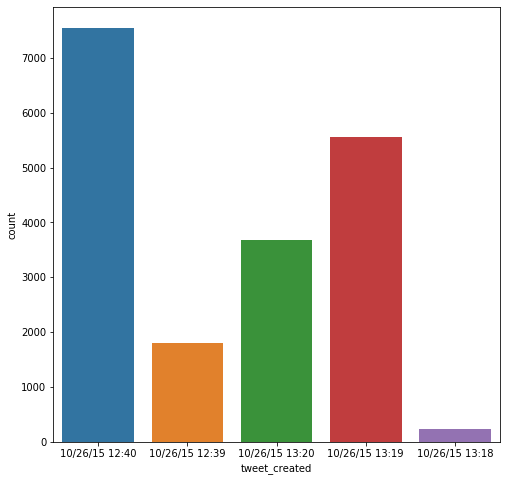

In [77]:
plt.figure(figsize=(8,8))
sns.countplot(df['tweet_created'],label="time")

In [78]:
Most_common_time = df['tweet_created'].value_counts()
Most_common_time

10/26/15 12:40    7548
10/26/15 13:19    5550
10/26/15 13:20    3671
10/26/15 12:39    1794
10/26/15 13:18     243
Name: tweet_created, dtype: int64

 Q2) What is the time when most of the tweets are created by Males and Females?

In [79]:
print("Most common time for tweeting is \n 10/26/15 12:40")

Most common time for tweeting is 
 10/26/15 12:40
